<a href="https://colab.research.google.com/github/RodeTavera/KOF/blob/main/Modelo%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo Datos**
# Notebook 3,4 | Algoritmos de recomendación (primera parte):



---



### Paso 1. Unión de las bases de datos Urbano y Rural.
**kof_denue_conapo_inegi_rur.csv** y **kof_denue_conapo_inegi_urb.csv** descargadas del siguiente directorio:
https://drive.google.com/drive/folders/1OlA1nUr5lkTp0tqrPV0osY2vCdYPwkB9?usp=sharing

**a)** Verifica que los nombres de las columnas de cada base sean los mismos. En caso de no ser así, cambia el nombre de las columnnas verificando que se refieren a la misma variable.

**b)** Verifica que se tienen el mismo número de columnas en cada base.

Aquí puedes verificar el nombre y el significado de las variables en la base de datos Urbano. https://www.inegi.org.mx/app/scitel/doc/descriptor/fd_agebmza_urbana_cpv2020.pdf

Aquí puedes verificar el nombre y el significado de las variables en la base de datos Rural. https://www.inegi.org.mx/app/scitel/doc/descriptor/fd_iter_cpv2020.pdf


**c)** Une ambas bases de datos y nombra la nueva base como **df**.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_rur = pd.read_csv('/content/drive/MyDrive/6to sem/IA y AD con impacto empresarial/kof_denue_conapo_inegi_rur.csv')

In [ ]:
data_urbana = pd.read_csv('/content/drive/MyDrive/6to sem/IA y AD con impacto empresarial/kof_denue_conapo_inegi_urbano.csv')

<ipython-input-6-92c995e84672>:1: DtypeWarning: Columns (185,1111,1117,1118,1135,1138,1142,1144,1146,1147,1148,1151,1154,1155,1159,1164,1165,1166,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1216,1217,1218,1219,1220,1223,1224,1225,1226,1227,1228,1229,1230,1231,1233,1234,1235,1236,1237,1256,1257,1258,1262,1263,1264,1265,1266,1267,1268,1273,1274,1275,1288,1289,1294,1297,1298,1303,1304,1306,1308,1310,1312,1314,1315,1320,1325,1327,1328,1329,1330,1331,1332,1333,1334) have mixed types. Specify dtype option on import or set low_memory=False.
  data_urbana = pd.read_csv('/content/drive/MyDrive/6to sem/IA y AD con impacto empresarial/kof_denue_conapo_inegi_urbano.csv')


In [ ]:
data_rur = data_rur.drop(['P_0A4', 'P_0A4_F', 'P_0A4_M', 'P_10A14', 'P_10A14_F',
                         'P_10A14_M', 'P_15A19', 'P_15A19_F', 'P_15A19_M',
                         'P_20A24', 'P_20A24_F','P_20A24_M','P_25A29','P_25A29_F',
                         'P_25A29_M','P_30A34','P_30A34_F','P_30A34_M','P_35A39',
                         'P_35A39_F','P_35A39_M','P_40A44','P_40A44_F','P_40A44_M',
                         'P_45A49','P_45A49_F','P_45A49_M','P_50A54','P_50A54_F',
                         'P_50A54_M','P_55A59','P_55A59_F','P_55A59_M','P_5A9','P_5A9_F',
                         'P_5A9_M','P_60A64','P_60A64_F','P_60A64_M','P_65A69','P_65A69_F',
                         'P_65A69_M','P_70A74','P_70A74_F','P_70A74_M','P_75A79','P_75A79_F',
                         'P_75A79_M','P_80A84','P_80A84_F','P_80A84_M','P_85YMAS','P_85YMAS_F',
                         'P_85YMAS_M', 'TAMLOC', 'distances'], axis=1)

In [ ]:
data_urbana = data_urbana.drop(['AGEB', 'MZA', ], axis=1)

In [ ]:
data_rur.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'KUNNR', 'Otros',
       'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR', 'ADES_946 ml_TETRAPACK_NR',
       'AGUA CIEL_1.2 Litros_PET_NR',
       'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
       'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
       'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
       ...
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC'],
      dtype='object', length=1333)

In [ ]:
data_urbana.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'KUNNR', 'Otros',
       'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR', 'ADES_946 ml_TETRAPACK_NR',
       'AGUA CIEL_1.2 Litros_PET_NR',
       'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
       'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
       'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
       ...
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC'],
      dtype='object', length=1333)

In [ ]:
df = pd.concat([data_rur,data_urbana])
df

,Unnamed: 0.1,Unnamed: 0,KUNNR,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,0,118,1300005503,654.1274,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,...,38,472,110,73,9,8,17,64,391,8
1,1,203,1300006528,475.3933,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,...,38,472,110,73,9,8,17,64,391,8
2,2,204,1300006533,350.0382,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,...,38,472,110,73,9,8,17,64,391,8
3,3,2217,1300201177,158.7562,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,...,38,472,110,73,9,8,17,64,391,8
4,4,2433,1300223225,76.0755,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,...,38,472,110,73,9,8,17,64,391,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13007,13007,17411,1400056310,2.5361,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,790,1348,986,805,348,144,31,115,491,16
13008,13008,17415,1400082675,34.8750,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,212,805,303,519,56,39,72,138,613,41
13009,13009,17417,1400082696,92.9888,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,218,583,260,307,67,25,42,84,398,19
13010,13010,17418,1400087006,30.2211,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,613,1512,957,744,207,110,101,195,706,35




---



In [ ]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0','KUNNR2' ], axis=1)

In [ ]:
col = df.columns

In [ ]:
col.to_list()

['KUNNR',
 'Otros',
 'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'ADES_946 ml_TETRAPACK_NR',
 'AGUA CIEL_1.2 Litros_PET_NR',
 'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
 'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
 'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
 'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
 'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
 'AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR',
 'AGUA CIEL_676.3 Onz / 20 LITROS_GARRAFÓN_RETORNABLE',
 'AMEYAL_67.6 Onz / 2 LITROS_PET_NR',
 'BEYONDKIDS_8.5 Onz / 250 ML=CC_PET_NR',
 'CC C/CAFE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CCLIGHT_20.3 Onz / 600 ML=CC_PET_NR',
 'CCLIGHT_33.8 Onz / 1 LITRO_PET_NR',
 'CCLIGHT_67.6 Onz / 2 LITROS_PET_NR',
 'CCLIGHT_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCS/AZUCAR_10.1 Onz / 300 ML=CC_PET_NR',
 'CCS/AZUCAR_101.4 Onz / 3 LITROS_PET_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_PET_NR',
 

In [ ]:
df = df.drop(['OID', 'POB1','index_right','geometry','_c0','BZIRK','STREET','STR_SUPPL3','CITY1','POST_CODE1'], axis=1)

In [ ]:
df = df.drop(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC'], axis=1)

In [ ]:
df = df.drop(['CVEGEO'], axis=1)

### Ejercicio 2. Hacer un análisis de datos faltantes.

**a)** Remplazar los valores "*" con NAN en la base de datos  **df**

**b)** ¿Es viable quitar las observaciones con datos faltantes?

**c)** Imputar o Amputar los datos faltantes.

**Sugerencia (opcional) : Utilizar k vecinos más cercanos para imputar los datos faltantes, puedes consultar la siguiente liga:**
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

In [ ]:
df = df.replace("*", np.nan)

In [ ]:
df.isna().sum().sum()

68035

In [ ]:
df.dtypes

KUNNR                                      int64
Otros                                    float64
ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR    float64
ADES_946 ml_TETRAPACK_NR                 float64
AGUA CIEL_1.2 Litros_PET_NR              float64
                                          ...   
VPH_CVJ                                   object
VPH_SINRTV                                object
VPH_SINLTC                                object
VPH_SINCINT                               object
VPH_SINTIC                                object
Length: 1313, dtype: object

In [ ]:
numeric_df = df.select_dtypes(include=['int', 'float'])

In [ ]:
cols = df.columns
cols = cols.to_list()
cols[1092:]

['POBFEM',
 'POBMAS',
 'P_0A2',
 'P_0A2_F',
 'P_0A2_M',
 'P_3YMAS',
 'P_3YMAS_F',
 'P_3YMAS_M',
 'P_5YMAS',
 'P_5YMAS_F',
 'P_5YMAS_M',
 'P_12YMAS',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'P_15YMAS',
 'P_15YMAS_F',
 'P_15YMAS_M',
 'P_18YMAS',
 'P_18YMAS_F',
 'P_18YMAS_M',
 'P_3A5',
 'P_3A5_F',
 'P_3A5_M',
 'P_6A11',
 'P_6A11_F',
 'P_6A11_M',
 'P_8A14',
 'P_8A14_F',
 'P_8A14_M',
 'P_12A14',
 'P_12A14_F',
 'P_12A14_M',
 'P_15A17',
 'P_15A17_F',
 'P_15A17_M',
 'P_18A24',
 'P_18A24_F',
 'P_18A24_M',
 'P_15A49_F',
 'P_60YMAS',
 'P_60YMAS_F',
 'P_60YMAS_M',
 'REL_H_M',
 'POB0_14',
 'POB15_64',
 'POB65_MAS',
 'PROM_HNV',
 'PNACENT',
 'PNACENT_F',
 'PNACENT_M',
 'PNACOE',
 'PNACOE_F',
 'PNACOE_M',
 'PRES2015',
 'PRES2015_F',
 'PRES2015_M',
 'PRESOE15',
 'PRESOE15_F',
 'PRESOE15_M',
 'P3YM_HLI',
 'P3YM_HLI_F',
 'P3YM_HLI_M',
 'P3HLINHE',
 'P3HLINHE_F',
 'P3HLINHE_M',
 'P3HLI_HE',
 'P3HLI_HE_F',
 'P3HLI_HE_M',
 'P5_HLI',
 'P5_HLI_NHE',
 'P5_HLI_HE',
 'PHOG_IND',
 'POB_AFRO',
 'POB_AFRO_F',
 'POB_AFRO_M'

In [ ]:
df.iloc[:,1092:] = df.iloc[:,1092:].astype(float)

<ipython-input-24-214cf7775ad2>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1092:] = df.iloc[:,1092:].astype(float)


In [ ]:
df.dtypes

KUNNR                                      int64
Otros                                    float64
ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR    float64
ADES_946 ml_TETRAPACK_NR                 float64
AGUA CIEL_1.2 Litros_PET_NR              float64
                                          ...   
VPH_CVJ                                  float64
VPH_SINRTV                               float64
VPH_SINLTC                               float64
VPH_SINCINT                              float64
VPH_SINTIC                               float64
Length: 1313, dtype: object

In [ ]:
cols[1092:]

['POBFEM',
 'POBMAS',
 'P_0A2',
 'P_0A2_F',
 'P_0A2_M',
 'P_3YMAS',
 'P_3YMAS_F',
 'P_3YMAS_M',
 'P_5YMAS',
 'P_5YMAS_F',
 'P_5YMAS_M',
 'P_12YMAS',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'P_15YMAS',
 'P_15YMAS_F',
 'P_15YMAS_M',
 'P_18YMAS',
 'P_18YMAS_F',
 'P_18YMAS_M',
 'P_3A5',
 'P_3A5_F',
 'P_3A5_M',
 'P_6A11',
 'P_6A11_F',
 'P_6A11_M',
 'P_8A14',
 'P_8A14_F',
 'P_8A14_M',
 'P_12A14',
 'P_12A14_F',
 'P_12A14_M',
 'P_15A17',
 'P_15A17_F',
 'P_15A17_M',
 'P_18A24',
 'P_18A24_F',
 'P_18A24_M',
 'P_15A49_F',
 'P_60YMAS',
 'P_60YMAS_F',
 'P_60YMAS_M',
 'REL_H_M',
 'POB0_14',
 'POB15_64',
 'POB65_MAS',
 'PROM_HNV',
 'PNACENT',
 'PNACENT_F',
 'PNACENT_M',
 'PNACOE',
 'PNACOE_F',
 'PNACOE_M',
 'PRES2015',
 'PRES2015_F',
 'PRES2015_M',
 'PRESOE15',
 'PRESOE15_F',
 'PRESOE15_M',
 'P3YM_HLI',
 'P3YM_HLI_F',
 'P3YM_HLI_M',
 'P3HLINHE',
 'P3HLINHE_F',
 'P3HLINHE_M',
 'P3HLI_HE',
 'P3HLI_HE_F',
 'P3HLI_HE_M',
 'P5_HLI',
 'P5_HLI_NHE',
 'P5_HLI_HE',
 'PHOG_IND',
 'POB_AFRO',
 'POB_AFRO_F',
 'POB_AFRO_M'

In [ ]:
df['KUNNR'] = df['KUNNR'].astype('str')

In [ ]:
df.dtypes

KUNNR                                     object
Otros                                    float64
ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR    float64
ADES_946 ml_TETRAPACK_NR                 float64
AGUA CIEL_1.2 Litros_PET_NR              float64
                                          ...   
VPH_CVJ                                  float64
VPH_SINRTV                               float64
VPH_SINLTC                               float64
VPH_SINCINT                              float64
VPH_SINTIC                               float64
Length: 1313, dtype: object

In [ ]:
object_df = df.select_dtypes(include=['object'])

object_df

,KUNNR,ZCAL_RM1,ZCAL_RM2,Urbano,GM_2020
0,1300005503,HM Tradicional,Otros HM,Rural,Bajo
1,1300006528,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo
2,1300006533,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo
3,1300201177,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo
4,1300223225,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo
...,...,...,...,...,...
13007,1400056310,Vending,Vending,Urbano,Medio
13008,1400082675,Vending,Vending,Urbano,Medio
13009,1400082696,Vending,Vending,Urbano,Muy alto
13010,1400087006,Vending,Vending,Urbano,Medio


In [ ]:
numeric_df = df.select_dtypes(include=['int', 'float'])

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
dfimputed = imputer.fit_transform(numeric_df)

In [ ]:
dfimputed.shape

(16288, 1308)

In [ ]:
df1 = pd.DataFrame(dfimputed, columns = numeric_df.columns)

In [ ]:
df1

,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR,AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR,AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,654.1274,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,4.2268,1.7611,9.5103,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
1,475.3933,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,0.0000,1.7611,6.3402,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
2,350.0382,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,0.0000,1.7611,19.0205,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
3,158.7562,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,6.3402,0.0000,53.8914,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
4,76.0755,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,0.0000,1.7611,0.0000,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,2.5361,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,790.0,1348.0,986.0,805.0,348.0,144.0,31.0,115.0,491.0,16.0
16284,34.8750,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,212.0,805.0,303.0,519.0,56.0,39.0,72.0,138.0,613.0,41.0
16285,92.9888,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,218.0,583.0,260.0,307.0,67.0,25.0,42.0,84.0,398.0,19.0
16286,30.2211,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,613.0,1512.0,957.0,744.0,207.0,110.0,101.0,195.0,706.0,35.0


In [ ]:
object_df.shape

(16288, 5)

In [ ]:
df1.shape

(16288, 1308)

In [ ]:
df1.reset_index(inplace=True, drop=True)

In [ ]:
object_df.reset_index(inplace=True, drop=True)

In [ ]:
object_df.columns

Index(['KUNNR', 'ZCAL_RM1', 'ZCAL_RM2', 'Urbano', 'GM_2020'], dtype='object')

In [ ]:
df_concat = pd.concat([object_df,df1], axis=1)

In [ ]:
df_concat

,KUNNR,ZCAL_RM1,ZCAL_RM2,Urbano,GM_2020,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1300005503,HM Tradicional,Otros HM,Rural,Bajo,654.1274,0.1409,0.4998,2.5361,0.0,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
1,1300006528,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo,475.3933,0.0000,0.9996,5.0721,0.0,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
2,1300006533,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo,350.0382,0.1409,0.0000,7.6083,0.0,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
3,1300201177,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo,158.7562,0.0000,0.0000,65.9379,0.0,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
4,1300223225,HM Tradicional,"Abts., Misc. y Minis",Rural,Bajo,76.0755,0.1409,0.0000,10.1442,0.0,...,38.0,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1400056310,Vending,Vending,Urbano,Medio,2.5361,0.0000,0.0000,0.0000,0.0,...,790.0,1348.0,986.0,805.0,348.0,144.0,31.0,115.0,491.0,16.0
16284,1400082675,Vending,Vending,Urbano,Medio,34.8750,0.0000,0.0000,0.0000,0.0,...,212.0,805.0,303.0,519.0,56.0,39.0,72.0,138.0,613.0,41.0
16285,1400082696,Vending,Vending,Urbano,Muy alto,92.9888,0.0000,0.0000,0.0000,0.0,...,218.0,583.0,260.0,307.0,67.0,25.0,42.0,84.0,398.0,19.0
16286,1400087006,Vending,Vending,Urbano,Medio,30.2211,0.0000,0.0000,0.0000,0.0,...,613.0,1512.0,957.0,744.0,207.0,110.0,101.0,195.0,706.0,35.0


In [ ]:
dfcols = df.columns
dfcols

Index(['KUNNR', 'Otros', 'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
       'ADES_946 ml_TETRAPACK_NR', 'AGUA CIEL_1.2 Litros_PET_NR',
       'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
       'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
       'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
       'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
       'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
       ...
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC'],
      dtype='object', length=1313)

In [ ]:
type(dfcols)

pandas.core.indexes.base.Index

In [ ]:
dfcols = dfcols.to_list()

In [ ]:
dfm = df_concat[dfcols]

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
dfm.reset_index(drop=True,inplace=True)

In [ ]:
comparison = df == dfm

In [ ]:
comparison.sum().sum()

21318109

In [ ]:
df.shape

(16288, 1313)

In [ ]:
dfm1 = dfm.copy()

In [ ]:
def sumar_columnas_por_string(df, string, nueva_columna):
    columnas_contiene_string = [columna for columna in df.columns[177:951] if string in columna]
    #print(columnas_contiene_string)
    df[nueva_columna] = df[columnas_contiene_string].sum(axis=1)
    return df

def aplicar_funcion_por_string(df, strings):
    for string in strings:
        nueva_columna = string + 's'
        df = sumar_columnas_por_string(df, string, nueva_columna)
    return df

strings = ['Fabricacin', 'Escuela', 'Almacen', 'Administracion', 'Alquiler', 'Agencias', 'Artista', 'Cantantes', 'Aserradero', 'Asilos', 
'Asociaciones', 'Autotransporte', 'Bancas', 'Billares', 'Boliches', 'Banca', 'Bufetes', 'Asilos', 'Cafeterias', 'Campamento', 'Camposdegolf', 
'Captacintratamiento', 'Funadación', 'Electricidad', 'Grutas', 'Hojalateria', 'Impartición', 'Jardinesbotnicosyzoolgicos', 'Laboratorio', 
'Lavanadería', 'Maquinado', 'Marina', 'Metales', 'Fundiación', 'Hoteles', 'Operadores', 'Excursiones', 'Espectculos', 'Otro', 'Parques Acuaticos', 
'Parques de Diversiones', 'Pesca', 'Carpanteria']

df_final = aplicar_funcion_por_string(dfm1, strings)

# Imprimir el DataFrame con la nueva columna

In [ ]:
df_final.columns

Index(['KUNNR', 'Otros', 'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
       'ADES_946 ml_TETRAPACK_NR', 'AGUA CIEL_1.2 Litros_PET_NR',
       'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
       'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
       'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
       'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
       'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
       ...
       'Metaless', 'Fundiacións', 'Hoteless', 'Operadoress', 'Excursioness',
       'Espectculoss', 'Parques Acuaticoss', 'Parques de Diversioness',
       'Pescas', 'Carpanterias'],
      dtype='object', length=1354)

In [ ]:
df_final.iloc[:,1313:].sum()

Fabricacins                    210638.0
Escuelas                       104226.0
Almacens                          117.0
Administracions                     0.0
Alquilers                       45425.0
Agenciass                       13816.0
Artistas                         2636.0
Cantantess                       1345.0
Aserraderos                         0.0
Asiloss                           380.0
Asociacioness                   48924.0
Autotransportes                   985.0
Bancass                             0.0
Billaress                        3335.0
Bolichess                         133.0
Bancas                          67795.0
Bufetess                        25358.0
Cafeteriass                         0.0
Campamentos                         0.0
Camposdegolfs                      18.0
Captacintratamientos             4432.0
Funadacións                         0.0
Electricidads                       0.0
Grutass                           142.0
Hojalaterias                        0.0


In [ ]:
lista = df_final.iloc[:,1313:].columns
lista

Index(['Fabricacins', 'Escuelas', 'Almacens', 'Administracions', 'Alquilers',
       'Agenciass', 'Artistas', 'Cantantess', 'Aserraderos', 'Asiloss',
       'Asociacioness', 'Autotransportes', 'Bancass', 'Billaress', 'Bolichess',
       'Bancas', 'Bufetess', 'Cafeteriass', 'Campamentos', 'Camposdegolfs',
       'Captacintratamientos', 'Funadacións', 'Electricidads', 'Grutass',
       'Hojalaterias', 'Imparticións', 'Jardinesbotnicosyzoolgicoss',
       'Laboratorios', 'Lavanaderías', 'Maquinados', 'Marinas', 'Metaless',
       'Fundiacións', 'Hoteless', 'Operadoress', 'Excursioness',
       'Espectculoss', 'Parques Acuaticoss', 'Parques de Diversioness',
       'Pescas', 'Carpanterias'],
      dtype='object')

In [ ]:
lista2 = df_final.iloc[:,1091:1312].columns.tolist()
lista2

['POBTOT',
 'POBFEM',
 'POBMAS',
 'P_0A2',
 'P_0A2_F',
 'P_0A2_M',
 'P_3YMAS',
 'P_3YMAS_F',
 'P_3YMAS_M',
 'P_5YMAS',
 'P_5YMAS_F',
 'P_5YMAS_M',
 'P_12YMAS',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'P_15YMAS',
 'P_15YMAS_F',
 'P_15YMAS_M',
 'P_18YMAS',
 'P_18YMAS_F',
 'P_18YMAS_M',
 'P_3A5',
 'P_3A5_F',
 'P_3A5_M',
 'P_6A11',
 'P_6A11_F',
 'P_6A11_M',
 'P_8A14',
 'P_8A14_F',
 'P_8A14_M',
 'P_12A14',
 'P_12A14_F',
 'P_12A14_M',
 'P_15A17',
 'P_15A17_F',
 'P_15A17_M',
 'P_18A24',
 'P_18A24_F',
 'P_18A24_M',
 'P_15A49_F',
 'P_60YMAS',
 'P_60YMAS_F',
 'P_60YMAS_M',
 'REL_H_M',
 'POB0_14',
 'POB15_64',
 'POB65_MAS',
 'PROM_HNV',
 'PNACENT',
 'PNACENT_F',
 'PNACENT_M',
 'PNACOE',
 'PNACOE_F',
 'PNACOE_M',
 'PRES2015',
 'PRES2015_F',
 'PRES2015_M',
 'PRESOE15',
 'PRESOE15_F',
 'PRESOE15_M',
 'P3YM_HLI',
 'P3YM_HLI_F',
 'P3YM_HLI_M',
 'P3HLINHE',
 'P3HLINHE_F',
 'P3HLINHE_M',
 'P3HLI_HE',
 'P3HLI_HE_F',
 'P3HLI_HE_M',
 'P5_HLI',
 'P5_HLI_NHE',
 'P5_HLI_HE',
 'PHOG_IND',
 'POB_AFRO',
 'POB_AFRO_F',
 '

In [ ]:
df_final

,KUNNR,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR,AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR,...,Metaless,Fundiacións,Hoteless,Operadoress,Excursioness,Espectculoss,Parques Acuaticoss,Parques de Diversioness,Pescas,Carpanterias
0,1300005503,0.0,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,4.2268,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1300006528,0.0,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1300006533,0.0,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1300201177,0.0,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,6.3402,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1300223225,0.0,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1400056310,11.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16284,1400082675,1.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16285,1400082696,2.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16286,1400087006,3.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final.columns.tolist()

['KUNNR',
 'Otros',
 'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'ADES_946 ml_TETRAPACK_NR',
 'AGUA CIEL_1.2 Litros_PET_NR',
 'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
 'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
 'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
 'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
 'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
 'AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR',
 'AGUA CIEL_676.3 Onz / 20 LITROS_GARRAFÓN_RETORNABLE',
 'AMEYAL_67.6 Onz / 2 LITROS_PET_NR',
 'BEYONDKIDS_8.5 Onz / 250 ML=CC_PET_NR',
 'CC C/CAFE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CCLIGHT_20.3 Onz / 600 ML=CC_PET_NR',
 'CCLIGHT_33.8 Onz / 1 LITRO_PET_NR',
 'CCLIGHT_67.6 Onz / 2 LITROS_PET_NR',
 'CCLIGHT_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCS/AZUCAR_10.1 Onz / 300 ML=CC_PET_NR',
 'CCS/AZUCAR_101.4 Onz / 3 LITROS_PET_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_PET_NR',
 

In [ ]:
df_final

,KUNNR,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR,AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR,...,Metaless,Fundiacións,Hoteless,Operadoress,Excursioness,Espectculoss,Parques Acuaticoss,Parques de Diversioness,Pescas,Carpanterias
0,1300005503,0.0,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,4.2268,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1300006528,0.0,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1300006533,0.0,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1300201177,0.0,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,6.3402,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1300223225,0.0,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1400056310,11.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16284,1400082675,1.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16285,1400082696,2.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16286,1400087006,3.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# df que agrupa productos
dfproducts = df_final[['ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'ADES_946 ml_TETRAPACK_NR',
 'AGUA CIEL_1.2 Litros_PET_NR',
 'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
 'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
 'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
 'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
 'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
 'AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR',
 'AGUA CIEL_676.3 Onz / 20 LITROS_GARRAFÓN_RETORNABLE',
 'AMEYAL_67.6 Onz / 2 LITROS_PET_NR',
 'BEYONDKIDS_8.5 Onz / 250 ML=CC_PET_NR',
 'CC C/CAFE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CCLIGHT_20.3 Onz / 600 ML=CC_PET_NR',
 'CCLIGHT_33.8 Onz / 1 LITRO_PET_NR',
 'CCLIGHT_67.6 Onz / 2 LITROS_PET_NR',
 'CCLIGHT_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCS/AZUCAR_10.1 Onz / 300 ML=CC_PET_NR',
 'CCS/AZUCAR_101.4 Onz / 3 LITROS_PET_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_PET_NR',
 'CCS/AZUCAR_13.5 Onz / 400 ML=CC_PET_NR',
 'CCS/AZUCAR_16.9 Onz / 500 ML=CC_PET_NR',
 'CCS/AZUCAR_20.3 Onz / 600 ML=CC_PET_NR',
 'CCS/AZUCAR_59.2 Onz / 1.75 LITROS_PET_NR',
 'CCS/AZUCAR_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCS/AZUCAR_84.5 Onz / 2.5 LITROS_PET_NR',
 'CCS/AZUCAR_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'CC_101.4 Onz / 3 LITROS_PET_NR',
 'CC_101.4 Onz / 3 LITROS_PET_RETORNABLE',
 'CC_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CC_12 Onz / 355/354 ML=CC_PET_NR',
 'CC_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CC_13.5 Onz / 400 ML=CC_PET_NR',
 'CC_16.9 Onz / 500 ML=CC_PET_NR',
 'CC_16.9 Onz / 500 ML=CC_VIDRIO_NR',
 'CC_16.9 Onz / 500 ML=CC_VIDRIO_RETORNABLE',
 'CC_20.3 Onz / 600 ML=CC_PET_NR',
 'CC_25.4 Onz / 750 ML=CC_PET_NR',
 'CC_33.8 Onz / 1 LITRO_PET_NR',
 'CC_42.3 Onz / 1.25 LITROS_VIDRIO_RETORNABLE',
 'CC_45.6 Onz / 1.35 LITROS_PET_NR',
 'CC_50.7 Onz / 1.5 LITROS_PET_NR',
 'CC_59.2 Onz / 1.75 LITROS_PET_NR',
 'CC_6.5 Onz / 192 ML=CC_VIDRIO_RETORNABLE',
 'CC_67.6 Onz / 2 LITROS_PET_NR',
 'CC_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CC_7.9 Onz / 235ml=CC_VIDRIO_NR',
 'CC_7.9 Onz / 235ml=CC_VIDRIO_RETORNABLE',
 'CC_76.1 Onz / 2.25 LITROS_PET_NR',
 'CC_8.5 Onz / 250 ML=CC_PET_NR',
 'CC_84.5 Onz / 2.5 LITROS_PET_NR',
 'CC_84.5 Onz / 2.5 LITROS_PET_RETORNABLE',
 'CIELGASAB_20.3 Onz / 600 ML=CC_PET_NR',
 'CIELMIN_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CIELMIN_12 Onz / 355/354 ML=CC_VIDRIO_NR',
 'CIELMIN_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CIELMIN_20.3 Onz / 600 ML=CC_PET_NR',
 'CIELMIN_59.2 Onz / 1.75 LITROS_PET_NR',
 'CIELMIN_67.6 Onz / 2 LITROS_PET_NR',
 'CIELMIN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'DELVLLE_1.89 Litros_TETRAPACK_NR',
 'DELVLLE_13.96 OZ / 413 ML_VIDRIO_NR',
 'DELVLLE_15.30 Onz /453 ml_ALUMINIO_NR',
 'DELVLLE_33.8 Onz / 1 LITRO_PET_NR',
 'DELVLLE_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'DELVLLE_8 Onz/236/237 ML=CC_PET_NR',
 'DELVLLE_8.5 Onz / 250 ML=CC_TETRAPACK_NR',
 'DLAWARE_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'DLAWARE_2 LITROS_PET_NR',
 'DLAWARE_20.3 Onz / 600 ML=CC_PET_NR',
 'DLAWARE_8.5 Onz / 250 ML=CC_PET_NR',
 'DV FRUT_101.4 Onz / 3 LITROS_PET_NR',
 'DV FRUT_12 Onz / 355/354 ML=CC_PET_NR',
 'DV FRUT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'DV FRUT_20.3 Onz / 600 ML=CC_PET_NR',
 'DV FRUT_45.6 Onz / 1.35 LITROS_PET_NR',
 'DV FRUT_50.7 Onz / 1.5 LITROS_PET_NR',
 'DV FRUT_67.6 Onz / 2 LITROS_PET_NR',
 'DV FRUT_8.5 Onz / 250 ML=CC_PET_NR',
 'DV FRUT_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'EXPRIM_20.3 Onz / 600 ML=CC_PET_NR',
 'EXPRIM_33.8 Onz / 1 LITRO_PET_NR',
 'FANTA_101.4 Onz / 3 LITROS_PET_NR',
 'FANTA_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'FANTA_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'FANTA_20.3 Onz / 600 ML=CC_PET_NR',
 'FANTA_45.6 Onz / 1.35 LITROS_PET_NR',
 'FANTA_67.6 Onz / 2 LITROS_PET_NR',
 'FANTA_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'FANTA_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'FLORIDA 7_1 LITRO_TETRAPACK_NR',
 'FRESCA-S/A_67.6 Onz / 2 LITROS_PET_NR',
 'FRESCA_101.4 Onz / 3 LITROS_PET_NR',
 'FRESCA_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'FRESCA_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'FRESCA_20.3 Onz / 600 ML=CC_PET_NR',
 'FRESCA_45.6 Onz / 1.35 LITROS_PET_NR',
 'FRESCA_67.6 Onz / 2 LITROS_PET_NR',
 'FRESCA_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'FRUTSI_8.5 Onz / 250 ML=CC_PET_NR',
 'FTA SAB_12 Onz / 355/354 ML=CC_PET_NR',
 'FTA SAB_20.3 Onz / 600 ML=CC_PET_NR',
 'FUZE_15.30 Onz /453 ml_ALUMINIO_NR',
 'FUZE_2 LITROS_PET_NR',
 'FUZE_20.3 Onz / 600 ML=CC_PET_NR',
 'LIMÓN Y NA_20.3 Onz / 600 ML=CC_PET_NR',
 'MONSTER_16 Onz / 473 ML=CC_ALUMINIO_NR',
 'MULTPRD_101.4 Onz / 3 LITROS_PET_NR',
 'MULTPRD_67.6 Onz / 2 LITROS_PET_NR',
 'MULTPRD_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'MULTPRD_84.5 Onz / 2.5 LITROS_PET_RETORNABLE',
 'MULTPRD_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'MUNDET_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'MUNDET_20.3 Onz / 600 ML=CC_PET_NR',
 'MUNDET_67.6 Onz / 2 LITROS_PET_NR',
 'MUNDET_8.5 Onz / 250 ML=CC_PET_NR',
 'NARANJAYNA_20.3 Onz / 600 ML=CC_PET_NR',
 'NARANJAYNA_67.6 Onz / 2 LITROS_PET_NR',
 'PREDATOR_16 Onz / 473 ML=CC_ALUMINIO_NR',
 'PRISCO_20.3 Onz / 600 ML=CC_PET_NR',
 'PWD FIT_16.9 Onz / 500 ML=CC_PET_NR',
 'PWERADE_16.9 Onz / 500 ML=CC_PET_NR',
 'PWERADE_20.3 Onz / 600 ML=CC_PET_NR',
 'PWERADE_33.8 Onz / 1 LITRO_PET_NR',
 'RSVADV_33.8 Onz / 1 LITRO_PET_NR',
 'SANTACLARA_1 LITRO_TETRAPACK_NR',
 'SANTACLARA_33.8 Onz / 1 LITRO_TETRAPACK_NR',
 'SANTACLARA_4.22 Onz / 125 ML_TETRAPACK_NR',
 'SANTACLARA_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'SENZAO_20.3 Onz / 600 ML=CC_PET_NR',
 'SENZAO_67.6 Onz / 2 LITROS_PLASTICO_NR',
 'SGRMSGN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SGRMSQN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SIDRAL_10.5 Onz / 311 ML=CC_VIDRIO_RETORNABLE',
 'SIDRAL_101.4 Onz / 3 LITROS_PET_NR',
 'SIDRAL_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SIDRAL_16.9 Onz / 500 ML=CC_VIDRIO_RETORNABLE',
 'SIDRAL_20.3 Onz / 600 ML=CC_PET_NR',
 'SIDRAL_45.6 Onz / 1.35 LITROS_PET_NR',
 'SIDRAL_67.6 Onz / 2 LITROS_PET_NR',
 'SIDRAL_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SIDRAL_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'SIDRL L_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SIDRL L_20.3 Onz / 600 ML=CC_PET_NR',
 'SIDRL L_67.6 Onz / 2 LITROS_PET_NR',
 'SPRITE-S/A_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SPRITE-S/A_20.3 Onz / 600 ML=CC_PET_NR',
 'SPRITE-S/A_7.9 Onz / 235ml=CC_VIDRIO_NR',
 'SPRITE_101.4 Onz / 3 LITROS_PET_NR',
 'SPRITE_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SPRITE_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'SPRITE_20.3 Onz / 600 ML=CC_PET_NR',
 'SPRITE_67.6 Onz / 2 LITROS_PET_NR',
 'SPRITE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SPRITE_7.9 Onz / 235ml=CC_VIDRIO_NR',
 'TOCHITWIST_20.3 Onz / 600 ML=CC_PET_NR',
 'TOPCHIC HS_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'TOPOCHI_12 Onz / 355/354 ML=CC_VIDRIO_NR',
 'TOPOCHI_20.3 Onz / 600 ML=CC_PET_NR',
 'TOPOCHI_50.7 Onz / 1.5 LITROS_PET_NR',
 'VALLE PULP_13.5 Onz / 400 ML=CC_PET_NR',
 'VITAMIN WA_16.9 Onz / 500 ML=CC_PET_NR',
 'YOLI_20.3 Onz / 600 ML=CC_PET_NR',
 'YOLI_67.6 Onz / 2 LITROS_PET_NR']]

dfproducts

,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR,AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR,AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR,AGUA CIEL_676.3 Onz / 20 LITROS_GARRAFÓN_RETORNABLE,...,SPRITE_7.9 Onz / 235ml=CC_VIDRIO_NR,TOCHITWIST_20.3 Onz / 600 ML=CC_PET_NR,TOPCHIC HS_12 Onz / 355/354 ML=CC_ALUMINIO_NR,TOPOCHI_12 Onz / 355/354 ML=CC_VIDRIO_NR,TOPOCHI_20.3 Onz / 600 ML=CC_PET_NR,TOPOCHI_50.7 Onz / 1.5 LITROS_PET_NR,VALLE PULP_13.5 Onz / 400 ML=CC_PET_NR,VITAMIN WA_16.9 Onz / 500 ML=CC_PET_NR,YOLI_20.3 Onz / 600 ML=CC_PET_NR,YOLI_67.6 Onz / 2 LITROS_PET_NR
0,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,4.2268,1.7611,9.5103,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
1,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,0.0000,1.7611,6.3402,0.0,...,0.0,0.0,0.0,0.0,1.268,0.0,0.0,0.0,0.000,0.0
2,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,0.0000,1.7611,19.0205,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
3,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,6.3402,0.0000,53.8914,0.0,...,0.0,0.0,0.0,0.0,1.268,0.0,0.0,0.0,5.072,0.0
4,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,0.0000,1.7611,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
16284,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
16285,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0
16286,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,1.902,0.0,0.0,0.0,0.000,0.0


In [ ]:
dfproducts.dtypes

ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR      float64
ADES_946 ml_TETRAPACK_NR                   float64
AGUA CIEL_1.2 Litros_PET_NR                float64
AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR    float64
AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR      float64
                                            ...   
TOPOCHI_50.7 Onz / 1.5 LITROS_PET_NR       float64
VALLE PULP_13.5 Onz / 400 ML=CC_PET_NR     float64
VITAMIN WA_16.9 Onz / 500 ML=CC_PET_NR     float64
YOLI_20.3 Onz / 600 ML=CC_PET_NR           float64
YOLI_67.6 Onz / 2 LITROS_PET_NR            float64
Length: 167, dtype: object

**Creación de variable CUP**

In [ ]:
# Paso 1: Definir el número por el cual deseas dividir los valores de "total"
divisor = len(dfproducts.columns)

# Paso 2: Crear una nueva columna en tu DataFrame
df_final['CUP'] = None  # Inicializamos la columna con valores nulos

# Paso 3: Realizar la división y asignar los resultados a la nueva columna
df_final['CUP'] = df_final['total'] / divisor

# Imprimir el DataFrame resultante
df_final

,KUNNR,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR,AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR,...,Fundiacións,Hoteless,Operadoress,Excursioness,Espectculoss,Parques Acuaticoss,Parques de Diversioness,Pescas,Carpanterias,CUP
0,1300005503,0.0,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,4.2268,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.500494
1,1300006528,0.0,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.339003
2,1300006533,0.0,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.519147
3,1300201177,0.0,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,6.3402,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.699728
4,1300223225,0.0,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.347747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1400056310,11.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894138
16284,1400082675,1.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.716207
16285,1400082696,2.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.127073
16286,1400087006,3.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.754963


**Creación de variable TOP**

In [ ]:
# Función para obtener los nombres de la variable con el valor más altos por fila

def obtener_variables_mas_altas(row):
    top_1_vars = row.nlargest(1)
    return top_1_vars.index.tolist()

# Aplicar la función a cada fila del DataFrame
df_final['TOP'] = dfproducts.apply(obtener_variables_mas_altas, axis=1)

# Imprimir el DataFrame resultante
df_final

,KUNNR,Otros,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR,AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR,AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR,AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR,...,Hoteless,Operadoress,Excursioness,Espectculoss,Parques Acuaticoss,Parques de Diversioness,Pescas,Carpanterias,CUP,TOP
0,1300005503,0.0,0.1409,0.4998,2.5361,0.0,3.5223,1.2680,4.2268,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.500494,[CC_101.4 Onz / 3 LITROS_PET_RETORNABLE]
1,1300006528,0.0,0.0000,0.9996,5.0721,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.339003,[CC_101.4 Onz / 3 LITROS_PET_RETORNABLE]
2,1300006533,0.0,0.1409,0.0000,7.6083,0.0,0.0000,3.8040,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.519147,[CC_101.4 Onz / 3 LITROS_PET_RETORNABLE]
3,1300201177,0.0,0.0000,0.0000,65.9379,0.0,7.0446,10.1440,6.3402,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.699728,[CC_20.3 Onz / 600 ML=CC_PET_NR]
4,1300223225,0.0,0.1409,0.0000,10.1442,0.0,0.0000,0.0000,0.0000,1.7611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.347747,[CC_20.3 Onz / 600 ML=CC_PET_NR]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1400056310,11.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894138,[CC_20.3 Onz / 600 ML=CC_PET_NR]
16284,1400082675,1.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.716207,[CC_12 Onz / 355/354 ML=CC_ALUMINIO_NR]
16285,1400082696,2.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.127073,[CC_20.3 Onz / 600 ML=CC_PET_NR]
16286,1400087006,3.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.754963,[CC_20.3 Onz / 600 ML=CC_PET_NR]


In [ ]:
dFinal = df_final[['KUNNR', 'ZZCRMA_LONG', 'ZZCRMA_LAT', 'ZCAL_RM1', 'ZCAL_RM2',
      'Urbano', 'ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
      'ADES_946 ml_TETRAPACK_NR',
      'AGUA CIEL_1.2 Litros_PET_NR',
      'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
      'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
      'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
      'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
      'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
      'AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR',
      'AGUA CIEL_676.3 Onz / 20 LITROS_GARRAFÓN_RETORNABLE',
      'AMEYAL_67.6 Onz / 2 LITROS_PET_NR',
      'BEYONDKIDS_8.5 Onz / 250 ML=CC_PET_NR',
      'CC C/CAFE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'CCLIGHT_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'CCLIGHT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'CCLIGHT_20.3 Onz / 600 ML=CC_PET_NR',
      'CCLIGHT_33.8 Onz / 1 LITRO_PET_NR',
      'CCLIGHT_67.6 Onz / 2 LITROS_PET_NR',
      'CCLIGHT_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'CCS/AZUCAR_10.1 Onz / 300 ML=CC_PET_NR',
      'CCS/AZUCAR_101.4 Onz / 3 LITROS_PET_NR',
      'CCS/AZUCAR_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'CCS/AZUCAR_12 Onz / 355/354 ML=CC_PET_NR',
      'CCS/AZUCAR_13.5 Onz / 400 ML=CC_PET_NR',
      'CCS/AZUCAR_16.9 Onz / 500 ML=CC_PET_NR',
      'CCS/AZUCAR_20.3 Onz / 600 ML=CC_PET_NR',
      'CCS/AZUCAR_59.2 Onz / 1.75 LITROS_PET_NR',
      'CCS/AZUCAR_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'CCS/AZUCAR_84.5 Onz / 2.5 LITROS_PET_NR',
      'CCS/AZUCAR_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
      'CC_101.4 Onz / 3 LITROS_PET_NR',
      'CC_101.4 Onz / 3 LITROS_PET_RETORNABLE',
      'CC_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'CC_12 Onz / 355/354 ML=CC_PET_NR',
      'CC_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'CC_13.5 Onz / 400 ML=CC_PET_NR',
      'CC_16.9 Onz / 500 ML=CC_PET_NR',
      'CC_16.9 Onz / 500 ML=CC_VIDRIO_NR',
      'CC_16.9 Onz / 500 ML=CC_VIDRIO_RETORNABLE',
      'CC_20.3 Onz / 600 ML=CC_PET_NR',
      'CC_25.4 Onz / 750 ML=CC_PET_NR',
      'CC_33.8 Onz / 1 LITRO_PET_NR',
      'CC_42.3 Onz / 1.25 LITROS_VIDRIO_RETORNABLE',
      'CC_45.6 Onz / 1.35 LITROS_PET_NR',
      'CC_50.7 Onz / 1.5 LITROS_PET_NR',
      'CC_59.2 Onz / 1.75 LITROS_PET_NR',
      'CC_6.5 Onz / 192 ML=CC_VIDRIO_RETORNABLE',
      'CC_67.6 Onz / 2 LITROS_PET_NR',
      'CC_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'CC_7.9 Onz / 235ml=CC_VIDRIO_NR',
      'CC_7.9 Onz / 235ml=CC_VIDRIO_RETORNABLE',
      'CC_76.1 Onz / 2.25 LITROS_PET_NR',
      'CC_8.5 Onz / 250 ML=CC_PET_NR',
      'CC_84.5 Onz / 2.5 LITROS_PET_NR',
      'CC_84.5 Onz / 2.5 LITROS_PET_RETORNABLE',
      'CIELGASAB_20.3 Onz / 600 ML=CC_PET_NR',
      'CIELMIN_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'CIELMIN_12 Onz / 355/354 ML=CC_VIDRIO_NR',
      'CIELMIN_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'CIELMIN_20.3 Onz / 600 ML=CC_PET_NR',
      'CIELMIN_59.2 Onz / 1.75 LITROS_PET_NR',
      'CIELMIN_67.6 Onz / 2 LITROS_PET_NR',
      'CIELMIN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'DELVLLE_1.89 Litros_TETRAPACK_NR',
      'DELVLLE_13.96 OZ / 413 ML_VIDRIO_NR',
      'DELVLLE_15.30 Onz /453 ml_ALUMINIO_NR',
      'DELVLLE_33.8 Onz / 1 LITRO_PET_NR',
      'DELVLLE_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
      'DELVLLE_8 Onz/236/237 ML=CC_PET_NR',
      'DELVLLE_8.5 Onz / 250 ML=CC_TETRAPACK_NR',
      'DLAWARE_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'DLAWARE_2 LITROS_PET_NR',
      'DLAWARE_20.3 Onz / 600 ML=CC_PET_NR',
      'DLAWARE_8.5 Onz / 250 ML=CC_PET_NR',
      'DV FRUT_101.4 Onz / 3 LITROS_PET_NR',
      'DV FRUT_12 Onz / 355/354 ML=CC_PET_NR',
      'DV FRUT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'DV FRUT_20.3 Onz / 600 ML=CC_PET_NR',
      'DV FRUT_45.6 Onz / 1.35 LITROS_PET_NR',
      'DV FRUT_50.7 Onz / 1.5 LITROS_PET_NR',
      'DV FRUT_67.6 Onz / 2 LITROS_PET_NR',
      'DV FRUT_8.5 Onz / 250 ML=CC_PET_NR',
      'DV FRUT_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
      'EXPRIM_20.3 Onz / 600 ML=CC_PET_NR',
      'EXPRIM_33.8 Onz / 1 LITRO_PET_NR',
      'FANTA_101.4 Onz / 3 LITROS_PET_NR',
      'FANTA_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'FANTA_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'FANTA_20.3 Onz / 600 ML=CC_PET_NR',
      'FANTA_45.6 Onz / 1.35 LITROS_PET_NR',
      'FANTA_67.6 Onz / 2 LITROS_PET_NR',
      'FANTA_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'FANTA_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
      'FLORIDA 7_1 LITRO_TETRAPACK_NR',
      'FRESCA-S/A_67.6 Onz / 2 LITROS_PET_NR',
      'FRESCA_101.4 Onz / 3 LITROS_PET_NR',
      'FRESCA_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'FRESCA_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'FRESCA_20.3 Onz / 600 ML=CC_PET_NR',
      'FRESCA_45.6 Onz / 1.35 LITROS_PET_NR',
      'FRESCA_67.6 Onz / 2 LITROS_PET_NR',
      'FRESCA_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
      'FRUTSI_8.5 Onz / 250 ML=CC_PET_NR',
      'FTA SAB_12 Onz / 355/354 ML=CC_PET_NR',
      'FTA SAB_20.3 Onz / 600 ML=CC_PET_NR',
      'FUZE_15.30 Onz /453 ml_ALUMINIO_NR',
      'FUZE_2 LITROS_PET_NR',
      'FUZE_20.3 Onz / 600 ML=CC_PET_NR',
      'LIMÓN Y NA_20.3 Onz / 600 ML=CC_PET_NR',
      'MONSTER_16 Onz / 473 ML=CC_ALUMINIO_NR',
      'MULTPRD_101.4 Onz / 3 LITROS_PET_NR',
      'MULTPRD_67.6 Onz / 2 LITROS_PET_NR',
      'MULTPRD_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'MULTPRD_84.5 Onz / 2.5 LITROS_PET_RETORNABLE',
      'MULTPRD_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
      'MUNDET_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'MUNDET_20.3 Onz / 600 ML=CC_PET_NR',
      'MUNDET_67.6 Onz / 2 LITROS_PET_NR',
      'MUNDET_8.5 Onz / 250 ML=CC_PET_NR',
      'NARANJAYNA_20.3 Onz / 600 ML=CC_PET_NR',
      'NARANJAYNA_67.6 Onz / 2 LITROS_PET_NR',
      'PREDATOR_16 Onz / 473 ML=CC_ALUMINIO_NR',
      'PRISCO_20.3 Onz / 600 ML=CC_PET_NR',
      'PWD FIT_16.9 Onz / 500 ML=CC_PET_NR',
      'PWERADE_16.9 Onz / 500 ML=CC_PET_NR',
      'PWERADE_20.3 Onz / 600 ML=CC_PET_NR',
      'PWERADE_33.8 Onz / 1 LITRO_PET_NR',
      'RSVADV_33.8 Onz / 1 LITRO_PET_NR',
      'SANTACLARA_1 LITRO_TETRAPACK_NR',
      'SANTACLARA_33.8 Onz / 1 LITRO_TETRAPACK_NR',
      'SANTACLARA_4.22 Onz / 125 ML_TETRAPACK_NR',
      'SANTACLARA_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
      'SENZAO_20.3 Onz / 600 ML=CC_PET_NR',
      'SENZAO_67.6 Onz / 2 LITROS_PLASTICO_NR',
      'SGRMSGN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'SGRMSQN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'SIDRAL_10.5 Onz / 311 ML=CC_VIDRIO_RETORNABLE',
      'SIDRAL_101.4 Onz / 3 LITROS_PET_NR',
      'SIDRAL_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'SIDRAL_16.9 Onz / 500 ML=CC_VIDRIO_RETORNABLE',
      'SIDRAL_20.3 Onz / 600 ML=CC_PET_NR',
      'SIDRAL_45.6 Onz / 1.35 LITROS_PET_NR',
      'SIDRAL_67.6 Onz / 2 LITROS_PET_NR',
      'SIDRAL_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'SIDRAL_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
      'SIDRL L_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'SIDRL L_20.3 Onz / 600 ML=CC_PET_NR',
      'SIDRL L_67.6 Onz / 2 LITROS_PET_NR',
      'SPRITE-S/A_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'SPRITE-S/A_20.3 Onz / 600 ML=CC_PET_NR',
      'SPRITE-S/A_7.9 Onz / 235ml=CC_VIDRIO_NR',
      'SPRITE_101.4 Onz / 3 LITROS_PET_NR',
      'SPRITE_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'SPRITE_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
      'SPRITE_20.3 Onz / 600 ML=CC_PET_NR',
      'SPRITE_67.6 Onz / 2 LITROS_PET_NR',
      'SPRITE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
      'SPRITE_7.9 Onz / 235ml=CC_VIDRIO_NR',
      'TOCHITWIST_20.3 Onz / 600 ML=CC_PET_NR',
      'TOPCHIC HS_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
      'TOPOCHI_12 Onz / 355/354 ML=CC_VIDRIO_NR',
      'TOPOCHI_20.3 Onz / 600 ML=CC_PET_NR',
      'TOPOCHI_50.7 Onz / 1.5 LITROS_PET_NR',
      'VALLE PULP_13.5 Onz / 400 ML=CC_PET_NR',
      'VITAMIN WA_16.9 Onz / 500 ML=CC_PET_NR',
      'YOLI_20.3 Onz / 600 ML=CC_PET_NR',
      'YOLI_67.6 Onz / 2 LITROS_PET_NR', 'total',
      'Fabricacins', 'Escuelas', 'Almacens', 'Administracions',
      'Alquilers', 'Agenciass', 'Artistas', 'Cantantess', 'Aserraderos', 'Asiloss','Asociacioness',
      'Autotransportes', 'Bancass', 'Billaress', 'Bolichess','Bancas', 'Bufetess', 'Cafeteriass',
      'Campamentos', 'Camposdegolfs','Captacintratamientos', 'Funadacións', 'Electricidads', 'Grutass',
      'Hojalaterias', 'Imparticións', 'Jardinesbotnicosyzoolgicoss','Laboratorios', 'Lavanaderías',
      'Maquinados', 'Marinas', 'Metaless','Fundiacións', 'Hoteless', 'Operadoress', 'Excursioness',
      'Espectculoss', 'Parques Acuaticoss', 'Parques de Diversioness','Pescas', 'Carpanterias',
      'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS',
       'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M',
       'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F',
       'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F',
       'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F',
       'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV',
       'PNACENT', 'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PRES2015', 'PRES2015_F',
       'PRES2015_M', 'PRESOE15', 'PRESOE15_F', 'PRESOE15_M', 'P3YM_HLI', 'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE',
       'P3HLINHE_F', 'P3HLINHE_M', 'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE', 'P5_HLI_HE',
       'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M', 'PCON_DISC', 'PCDISC_MOT', 'PCDISC_VIS', 'PCDISC_LENG',
       'PCDISC_AUD', 'PCDISC_MOT2', 'PCDISC_MEN', 'PCON_LIMI', 'PCLIM_CSB', 'PCLIM_VIS', 'PCLIM_HACO', 'PCLIM_OAUD',
       'PCLIM_MOT2', 'PCLIM_RE_CO', 'PCLIM_PMEN', 'PSIND_LIM', 'P3A5_NOA', 'P3A5_NOA_F', 'P3A5_NOA_M', 'P6A11_NOA',
       'P6A11_NOAF', 'P6A11_NOAM', 'P12A14NOA', 'P12A14NOAF', 'P12A14NOAM', 'P15A17A', 'P15A17A_F', 'P15A17A_M',
       'P18A24A', 'P18A24A_F','P18A24A_M', 'P8A14AN','P8A14AN_F','P8A14AN_M','P15YM_AN','P15YM_AN_F','P15YM_AN_M',
       'P15YM_SE', 'P15YM_SE_F','P15YM_SE_M','P15PRI_IN','P15PRI_INF','P15PRI_INM','P15PRI_CO','P15PRI_COF','P15PRI_COM',
       'P15SEC_IN','P15SEC_INF','P15SEC_INM','P15SEC_CO','P15SEC_COF','P15SEC_COM','P18YM_PB','P18YM_PB_F','P18YM_PB_M',
       'GRAPROES','GRAPROES_F','GRAPROES_M','PEA','PEA_F','PEA_M','PE_INAC','PE_INAC_F','PE_INAC_M','POCUPADA','POCUPADA_F',
       'POCUPADA_M','PDESOCUP','PDESOCUP_F','PDESOCUP_M','PSINDER','PDER_SS','PDER_IMSS','PDER_ISTE','PDER_ISTEE','PAFIL_PDOM',
       'PDER_SEGP','PDER_IMSSB','PAFIL_IPRIV','PAFIL_OTRAI','P12YM_SOLT','P12YM_CASA','P12YM_SEPA','PCATOLICA','PRO_CRIEVA',
       'POTRAS_REL','PSIN_RELIG','TOTHOG','HOGJEF_F','HOGJEF_M','POBHOG','PHOGJEF_F','PHOGJEF_M','VIVTOT','TVIVHAB','TVIVPAR',
       'VIVPAR_HAB','VIVPARH_CV','TVIVPARHAB','VIVPAR_DES','VIVPAR_UT','OCUPVIVPAR','PROM_OCUP','PRO_OCUP_C','VPH_PISODT',
       'VPH_PISOTI','VPH_1DOR','VPH_2YMASD','VPH_1CUART','VPH_2CUART','VPH_3YMASC','VPH_C_ELEC','VPH_S_ELEC','VPH_AGUADV',
       'VPH_AEASP','VPH_AGUAFV','VPH_TINACO','VPH_CISTER','VPH_EXCSA','VPH_LETR','VPH_DRENAJ','VPH_NODREN','VPH_C_SERV',
       'VPH_NDEAED','VPH_DSADMA','VPH_NDACMM', 'VPH_SNBIEN', 'VPH_REFRI', 'VPH_LAVAD', 'VPH_HMICRO', 'VPH_AUTOM', 'VPH_MOTO',
       'VPH_BICI','VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV','VPH_SINLTC', 'VPH_SINCINT',
       'CUP','TOP']]

dFinal

,KUNNR,ZZCRMA_LONG,ZZCRMA_LAT,ZCAL_RM1,ZCAL_RM2,Urbano,ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR,ADES_946 ml_TETRAPACK_NR,AGUA CIEL_1.2 Litros_PET_NR,AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,CUP,TOP
0,1300005503,-99.681232,19.413730,HM Tradicional,Otros HM,Rural,0.1409,0.4998,2.5361,0.0,...,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,19.500494,[CC_101.4 Onz / 3 LITROS_PET_RETORNABLE]
1,1300006528,-99.684848,19.409035,HM Tradicional,"Abts., Misc. y Minis",Rural,0.0000,0.9996,5.0721,0.0,...,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,8.339003,[CC_101.4 Onz / 3 LITROS_PET_RETORNABLE]
2,1300006533,-99.676478,19.416564,HM Tradicional,"Abts., Misc. y Minis",Rural,0.1409,0.0000,7.6083,0.0,...,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,13.519147,[CC_101.4 Onz / 3 LITROS_PET_RETORNABLE]
3,1300201177,-99.688920,19.407488,HM Tradicional,"Abts., Misc. y Minis",Rural,0.0000,0.0000,65.9379,0.0,...,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,12.699728,[CC_20.3 Onz / 600 ML=CC_PET_NR]
4,1300223225,-99.681353,19.415373,HM Tradicional,"Abts., Misc. y Minis",Rural,0.1409,0.0000,10.1442,0.0,...,472.0,110.0,73.0,9.0,8.0,17.0,64.0,391.0,2.347747,[CC_20.3 Onz / 600 ML=CC_PET_NR]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1400056310,-99.466850,19.174423,Vending,Vending,Urbano,0.0000,0.0000,0.0000,0.0,...,1348.0,986.0,805.0,348.0,144.0,31.0,115.0,491.0,0.894138,[CC_20.3 Onz / 600 ML=CC_PET_NR]
16284,1400082675,-100.250330,19.067463,Vending,Vending,Urbano,0.0000,0.0000,0.0000,0.0,...,805.0,303.0,519.0,56.0,39.0,72.0,138.0,613.0,2.716207,[CC_12 Onz / 355/354 ML=CC_ALUMINIO_NR]
16285,1400082696,-100.135600,19.162340,Vending,Vending,Urbano,0.0000,0.0000,0.0000,0.0,...,583.0,260.0,307.0,67.0,25.0,42.0,84.0,398.0,7.127073,[CC_20.3 Onz / 600 ML=CC_PET_NR]
16286,1400087006,-100.135060,19.201430,Vending,Vending,Urbano,0.0000,0.0000,0.0000,0.0,...,1512.0,957.0,744.0,207.0,110.0,101.0,195.0,706.0,1.754963,[CC_20.3 Onz / 600 ML=CC_PET_NR]


In [ ]:
dFinal.dtypes

KUNNR           object
ZZCRMA_LONG    float64
ZZCRMA_LAT     float64
ZCAL_RM1        object
ZCAL_RM2        object
                ...   
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
CUP            float64
TOP             object
Length: 438, dtype: object

### Clusterización tomando en cuenta la similitud entre clientes en términos de comportamiento de compra

PCC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

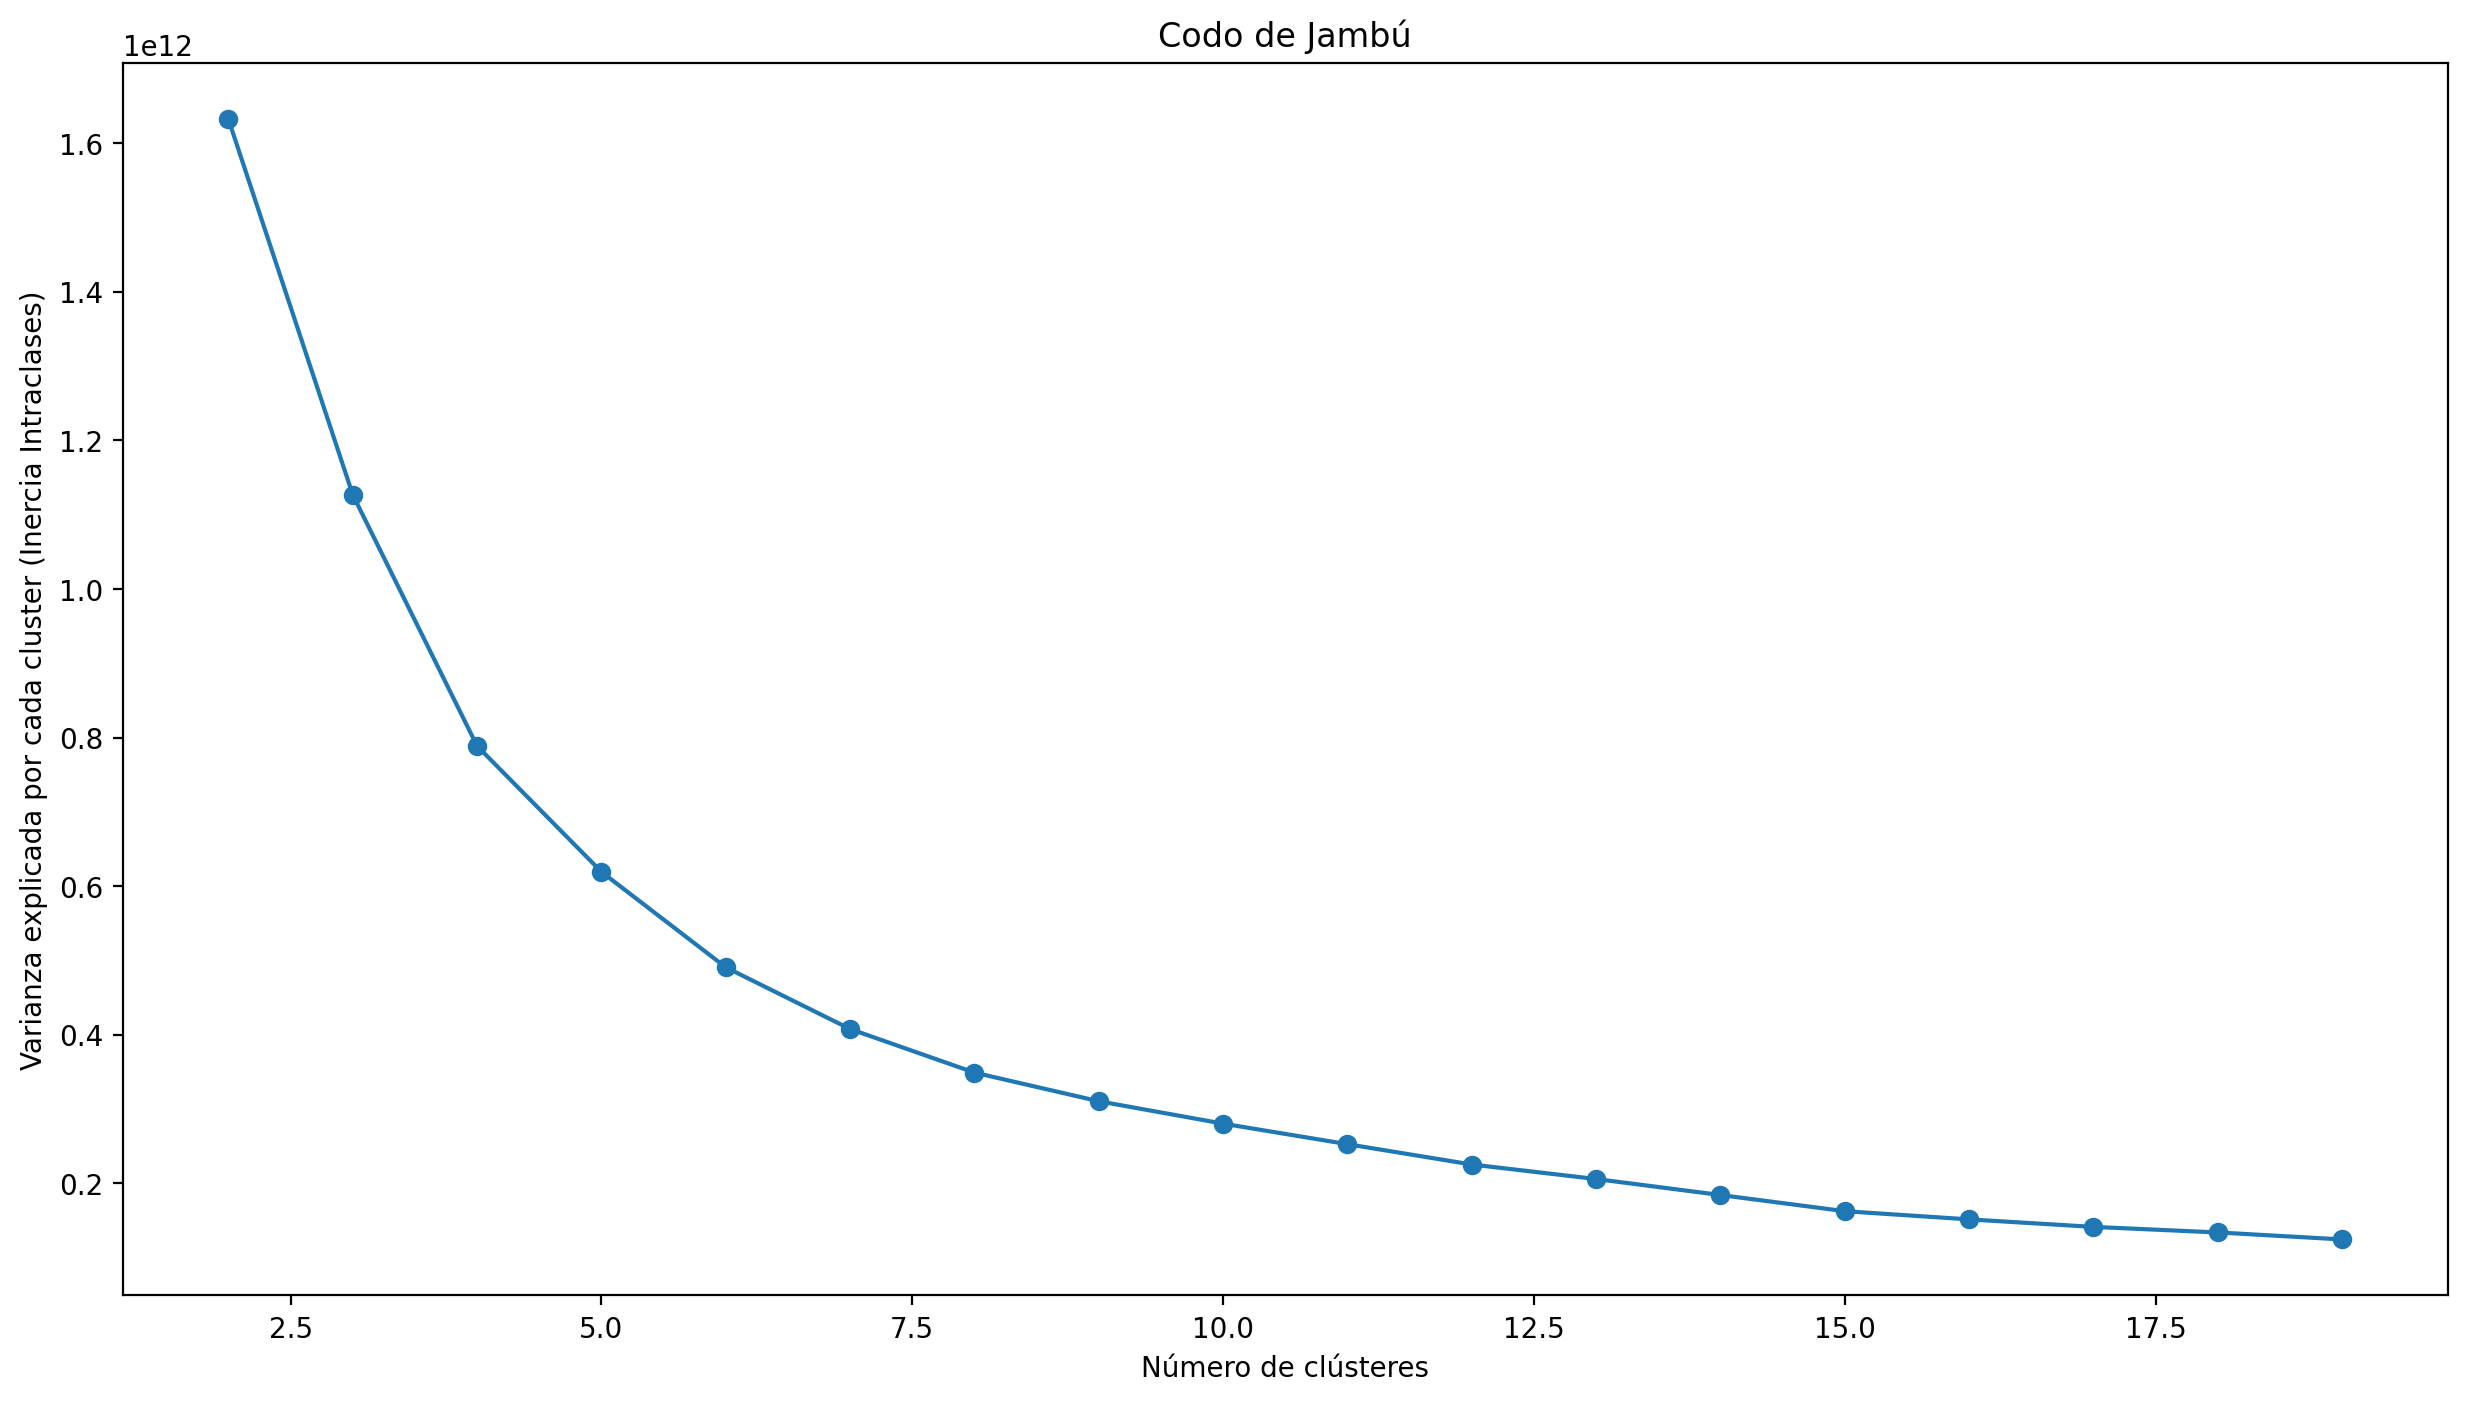

In [ ]:
# Cálculo de varianzas intra-clase según cantidad de clusters
dfvar_pcc = dFinal[['total', 'CUP','ADES_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'ADES_946 ml_TETRAPACK_NR',
 'AGUA CIEL_1.2 Litros_PET_NR',
 'AGUA CIEL_12 Onz / 355/354 ML=CC_PET_NR',
 'AGUA CIEL_169.1 Onz / 5 LITROS_PET_NR',
 'AGUA CIEL_20.3 Onz / 600 ML=CC_PET_NR',
 'AGUA CIEL_33.8 Onz / 1 LITRO_PET_NR',
 'AGUA CIEL_338.1 Onz / 10 LITROS_PET_NR',
 'AGUA CIEL_50.7 Onz / 1.5 LITROS_PET_NR',
 'AGUA CIEL_676.3 Onz / 20 LITROS_GARRAFÓN_RETORNABLE',
 'AMEYAL_67.6 Onz / 2 LITROS_PET_NR',
 'BEYONDKIDS_8.5 Onz / 250 ML=CC_PET_NR',
 'CC C/CAFE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCLIGHT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CCLIGHT_20.3 Onz / 600 ML=CC_PET_NR',
 'CCLIGHT_33.8 Onz / 1 LITRO_PET_NR',
 'CCLIGHT_67.6 Onz / 2 LITROS_PET_NR',
 'CCLIGHT_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCS/AZUCAR_10.1 Onz / 300 ML=CC_PET_NR',
 'CCS/AZUCAR_101.4 Onz / 3 LITROS_PET_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CCS/AZUCAR_12 Onz / 355/354 ML=CC_PET_NR',
 'CCS/AZUCAR_13.5 Onz / 400 ML=CC_PET_NR',
 'CCS/AZUCAR_16.9 Onz / 500 ML=CC_PET_NR',
 'CCS/AZUCAR_20.3 Onz / 600 ML=CC_PET_NR',
 'CCS/AZUCAR_59.2 Onz / 1.75 LITROS_PET_NR',
 'CCS/AZUCAR_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CCS/AZUCAR_84.5 Onz / 2.5 LITROS_PET_NR',
 'CCS/AZUCAR_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'CC_101.4 Onz / 3 LITROS_PET_NR',
 'CC_101.4 Onz / 3 LITROS_PET_RETORNABLE',
 'CC_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CC_12 Onz / 355/354 ML=CC_PET_NR',
 'CC_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CC_13.5 Onz / 400 ML=CC_PET_NR',
 'CC_16.9 Onz / 500 ML=CC_PET_NR',
 'CC_16.9 Onz / 500 ML=CC_VIDRIO_NR',
 'CC_16.9 Onz / 500 ML=CC_VIDRIO_RETORNABLE',
 'CC_20.3 Onz / 600 ML=CC_PET_NR',
 'CC_25.4 Onz / 750 ML=CC_PET_NR',
 'CC_33.8 Onz / 1 LITRO_PET_NR',
 'CC_42.3 Onz / 1.25 LITROS_VIDRIO_RETORNABLE',
 'CC_45.6 Onz / 1.35 LITROS_PET_NR',
 'CC_50.7 Onz / 1.5 LITROS_PET_NR',
 'CC_59.2 Onz / 1.75 LITROS_PET_NR',
 'CC_6.5 Onz / 192 ML=CC_VIDRIO_RETORNABLE',
 'CC_67.6 Onz / 2 LITROS_PET_NR',
 'CC_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'CC_7.9 Onz / 235ml=CC_VIDRIO_NR',
 'CC_7.9 Onz / 235ml=CC_VIDRIO_RETORNABLE',
 'CC_76.1 Onz / 2.25 LITROS_PET_NR',
 'CC_8.5 Onz / 250 ML=CC_PET_NR',
 'CC_84.5 Onz / 2.5 LITROS_PET_NR',
 'CC_84.5 Onz / 2.5 LITROS_PET_RETORNABLE',
 'CIELGASAB_20.3 Onz / 600 ML=CC_PET_NR',
 'CIELMIN_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'CIELMIN_12 Onz / 355/354 ML=CC_VIDRIO_NR',
 'CIELMIN_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'CIELMIN_20.3 Onz / 600 ML=CC_PET_NR',
 'CIELMIN_59.2 Onz / 1.75 LITROS_PET_NR',
 'CIELMIN_67.6 Onz / 2 LITROS_PET_NR',
 'CIELMIN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'DELVLLE_1.89 Litros_TETRAPACK_NR',
 'DELVLLE_13.96 OZ / 413 ML_VIDRIO_NR',
 'DELVLLE_15.30 Onz /453 ml_ALUMINIO_NR',
 'DELVLLE_33.8 Onz / 1 LITRO_PET_NR',
 'DELVLLE_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'DELVLLE_8 Onz/236/237 ML=CC_PET_NR',
 'DELVLLE_8.5 Onz / 250 ML=CC_TETRAPACK_NR',
 'DLAWARE_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'DLAWARE_2 LITROS_PET_NR',
 'DLAWARE_20.3 Onz / 600 ML=CC_PET_NR',
 'DLAWARE_8.5 Onz / 250 ML=CC_PET_NR',
 'DV FRUT_101.4 Onz / 3 LITROS_PET_NR',
 'DV FRUT_12 Onz / 355/354 ML=CC_PET_NR',
 'DV FRUT_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'DV FRUT_20.3 Onz / 600 ML=CC_PET_NR',
 'DV FRUT_45.6 Onz / 1.35 LITROS_PET_NR',
 'DV FRUT_50.7 Onz / 1.5 LITROS_PET_NR',
 'DV FRUT_67.6 Onz / 2 LITROS_PET_NR',
 'DV FRUT_8.5 Onz / 250 ML=CC_PET_NR',
 'DV FRUT_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'EXPRIM_20.3 Onz / 600 ML=CC_PET_NR',
 'EXPRIM_33.8 Onz / 1 LITRO_PET_NR',
 'FANTA_101.4 Onz / 3 LITROS_PET_NR',
 'FANTA_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'FANTA_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'FANTA_20.3 Onz / 600 ML=CC_PET_NR',
 'FANTA_45.6 Onz / 1.35 LITROS_PET_NR',
 'FANTA_67.6 Onz / 2 LITROS_PET_NR',
 'FANTA_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'FANTA_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'FLORIDA 7_1 LITRO_TETRAPACK_NR',
 'FRESCA-S/A_67.6 Onz / 2 LITROS_PET_NR',
 'FRESCA_101.4 Onz / 3 LITROS_PET_NR',
 'FRESCA_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'FRESCA_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'FRESCA_20.3 Onz / 600 ML=CC_PET_NR',
 'FRESCA_45.6 Onz / 1.35 LITROS_PET_NR',
 'FRESCA_67.6 Onz / 2 LITROS_PET_NR',
 'FRESCA_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'FRUTSI_8.5 Onz / 250 ML=CC_PET_NR',
 'FTA SAB_12 Onz / 355/354 ML=CC_PET_NR',
 'FTA SAB_20.3 Onz / 600 ML=CC_PET_NR',
 'FUZE_15.30 Onz /453 ml_ALUMINIO_NR',
 'FUZE_2 LITROS_PET_NR',
 'FUZE_20.3 Onz / 600 ML=CC_PET_NR',
 'LIMÓN Y NA_20.3 Onz / 600 ML=CC_PET_NR',
 'MONSTER_16 Onz / 473 ML=CC_ALUMINIO_NR',
 'MULTPRD_101.4 Onz / 3 LITROS_PET_NR',
 'MULTPRD_67.6 Onz / 2 LITROS_PET_NR',
 'MULTPRD_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'MULTPRD_84.5 Onz / 2.5 LITROS_PET_RETORNABLE',
 'MULTPRD_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'MUNDET_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'MUNDET_20.3 Onz / 600 ML=CC_PET_NR',
 'MUNDET_67.6 Onz / 2 LITROS_PET_NR',
 'MUNDET_8.5 Onz / 250 ML=CC_PET_NR',
 'NARANJAYNA_20.3 Onz / 600 ML=CC_PET_NR',
 'NARANJAYNA_67.6 Onz / 2 LITROS_PET_NR',
 'PREDATOR_16 Onz / 473 ML=CC_ALUMINIO_NR',
 'PRISCO_20.3 Onz / 600 ML=CC_PET_NR',
 'PWD FIT_16.9 Onz / 500 ML=CC_PET_NR',
 'PWERADE_16.9 Onz / 500 ML=CC_PET_NR',
 'PWERADE_20.3 Onz / 600 ML=CC_PET_NR',
 'PWERADE_33.8 Onz / 1 LITRO_PET_NR',
 'RSVADV_33.8 Onz / 1 LITRO_PET_NR',
 'SANTACLARA_1 LITRO_TETRAPACK_NR',
 'SANTACLARA_33.8 Onz / 1 LITRO_TETRAPACK_NR',
 'SANTACLARA_4.22 Onz / 125 ML_TETRAPACK_NR',
 'SANTACLARA_6.8 Onz / 200 ML=CC_TETRAPACK_NR',
 'SENZAO_20.3 Onz / 600 ML=CC_PET_NR',
 'SENZAO_67.6 Onz / 2 LITROS_PLASTICO_NR',
 'SGRMSGN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SGRMSQN_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SIDRAL_10.5 Onz / 311 ML=CC_VIDRIO_RETORNABLE',
 'SIDRAL_101.4 Onz / 3 LITROS_PET_NR',
 'SIDRAL_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SIDRAL_16.9 Onz / 500 ML=CC_VIDRIO_RETORNABLE',
 'SIDRAL_20.3 Onz / 600 ML=CC_PET_NR',
 'SIDRAL_45.6 Onz / 1.35 LITROS_PET_NR',
 'SIDRAL_67.6 Onz / 2 LITROS_PET_NR',
 'SIDRAL_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SIDRAL_84.5 Onz / 2.5 LITROS_REF PET_RETORNABLE',
 'SIDRL L_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SIDRL L_20.3 Onz / 600 ML=CC_PET_NR',
 'SIDRL L_67.6 Onz / 2 LITROS_PET_NR',
 'SPRITE-S/A_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SPRITE-S/A_20.3 Onz / 600 ML=CC_PET_NR',
 'SPRITE-S/A_7.9 Onz / 235ml=CC_VIDRIO_NR',
 'SPRITE_101.4 Onz / 3 LITROS_PET_NR',
 'SPRITE_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'SPRITE_12 Onz / 355/354 ML=CC_VIDRIO_RETORNABLE',
 'SPRITE_20.3 Onz / 600 ML=CC_PET_NR',
 'SPRITE_67.6 Onz / 2 LITROS_PET_NR',
 'SPRITE_7.9 Onz / 235ml=CC_ALUMINIO_NR',
 'SPRITE_7.9 Onz / 235ml=CC_VIDRIO_NR',
 'TOCHITWIST_20.3 Onz / 600 ML=CC_PET_NR',
 'TOPCHIC HS_12 Onz / 355/354 ML=CC_ALUMINIO_NR',
 'TOPOCHI_12 Onz / 355/354 ML=CC_VIDRIO_NR',
 'TOPOCHI_20.3 Onz / 600 ML=CC_PET_NR',
 'TOPOCHI_50.7 Onz / 1.5 LITROS_PET_NR',
 'VALLE PULP_13.5 Onz / 400 ML=CC_PET_NR',
 'VITAMIN WA_16.9 Onz / 500 ML=CC_PET_NR',
 'YOLI_20.3 Onz / 600 ML=CC_PET_NR',
 'YOLI_67.6 Onz / 2 LITROS_PET_NR']]

from sklearn.cluster import KMeans

Nc = range(2, 20)
kmediasList = [KMeans(n_clusters=i) for i in Nc]
varianza = [kmediasList[i].fit(dfvar_pcc).inertia_ for i in range(len(kmediasList))]

#Gráfico
fig, ax = plt.subplots(1,1, figsize = (15,8), dpi = 200)
ax.plot(Nc,varianza,'o-')
ax.set_xlabel('Número de clústeres')
ax.set_ylabel('Varianza explicada por cada cluster (Inercia Intraclases)')
ax.set_title('Codo de Jambú')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecciona las variables a considerar para el análisis
variables = dfvar_pcc.columns

# Preprocesamiento de datos: normalización de las variables
scaler = MinMaxScaler()
dFinal[variables] = scaler.fit_transform(dFinal[variables])

# Crea el modelo de clustering con k-means
num_clusters = 7  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=222)
kmeans.fit(dFinal[variables])

# Asigna una etiqueta de cluster a cada cliente
dFinal['PCC'] = kmeans.labels_ + 1  # Agregar 1 al rango de los valores de 'PCC'

# Calcula la similitud entre los clientes dentro de cada cluster
similarity_matrix = pd.DataFrame(index=range(1, num_clusters + 1), columns=range(1, num_clusters + 1))
for i in range(1, num_clusters + 1):
    for j in range(1, num_clusters + 1):
        similarity_matrix.loc[i, j] = sum(dFinal[dFinal['PCC'] == i].index.isin(dFinal[dFinal['PCC'] == j].index))

# Imprime la matriz de similitud
similarity_matrix

<ipython-input-68-f5f39a279c05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dFinal[variables] = scaler.fit_transform(dFinal[variables])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-68-f5f39a279c05>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dFinal['PCC'] = kmeans.labels_ + 1  # Agregar 1 al rango

,1,2,3,4,5,6,7
1,12627,0,0,0,0,0,0
2,0,17,0,0,0,0,0
3,0,0,2620,0,0,0,0
4,0,0,0,314,0,0,0
5,0,0,0,0,568,0,0
6,0,0,0,0,0,11,0
7,0,0,0,0,0,0,131


In [ ]:
dFinal['PCC'].unique()

array([3, 1, 5, 4, 7, 6, 2], dtype=int32)

### Clusterización por similitud entre clientes en términos generales

CSC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

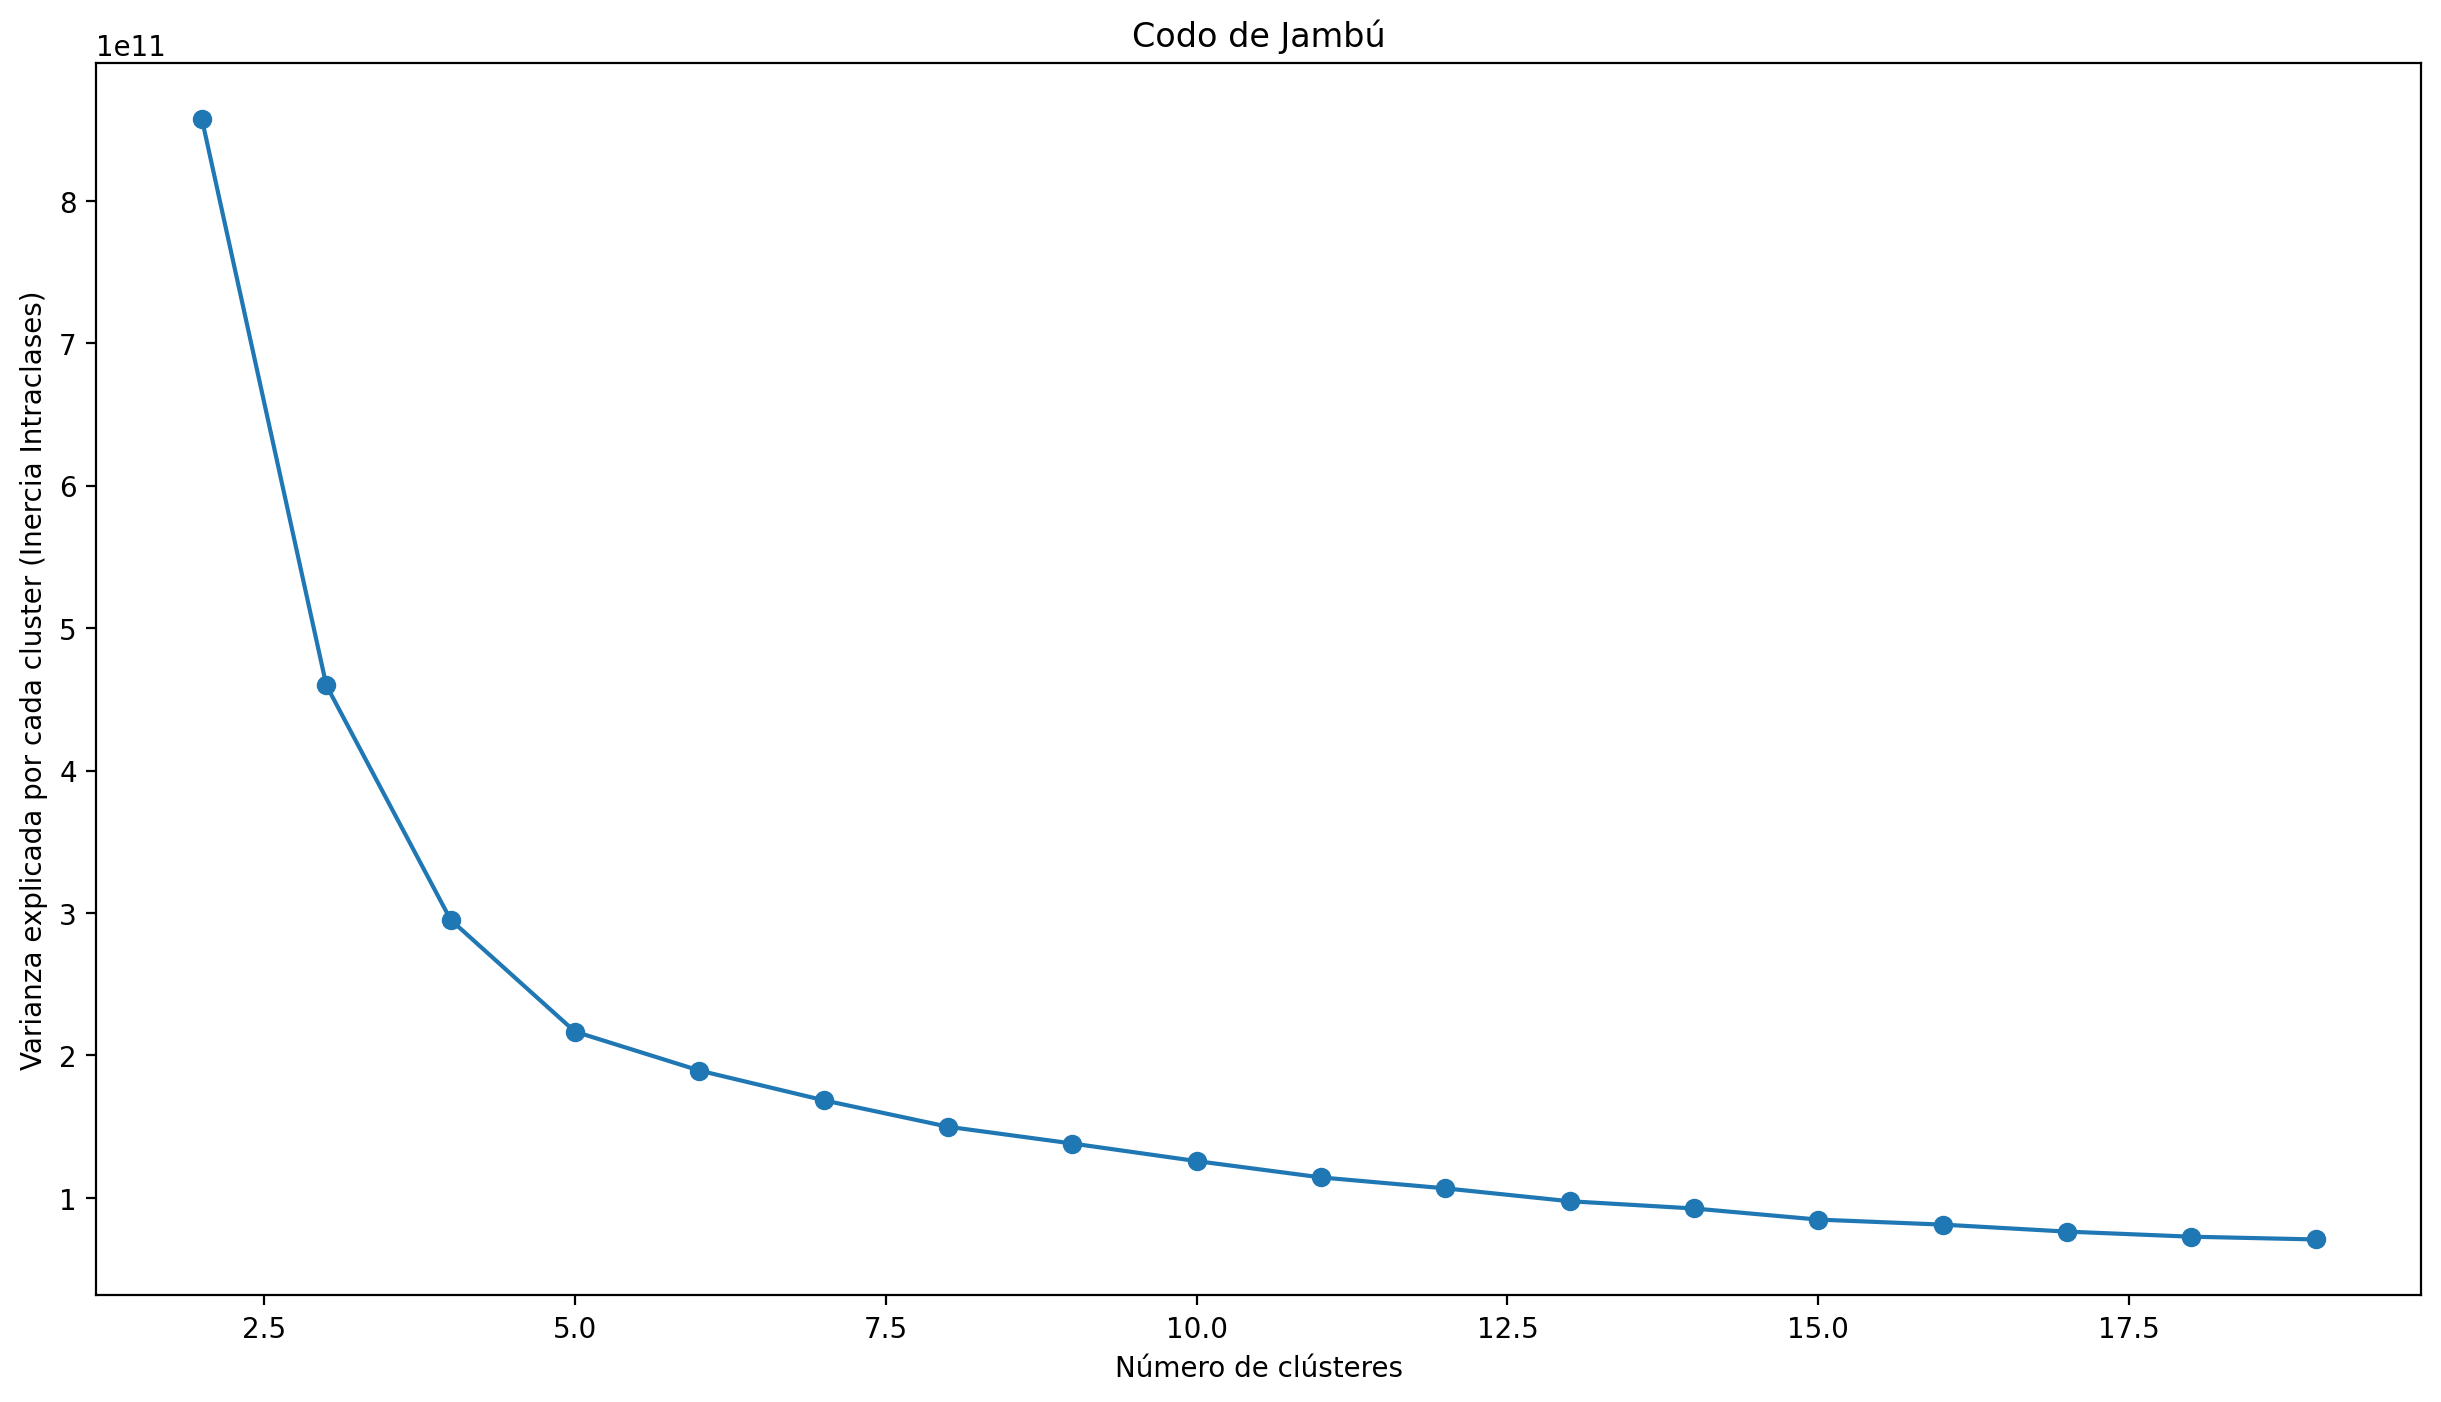

In [ ]:
# Cálculo de varianzas intra-clase según cantidad de clusters
dfvar_csc = dFinal[['ZZCRMA_LONG', 'ZZCRMA_LAT',
      'Fabricacins', 'Escuelas', 'Almacens', 'Administracions',
      'Alquilers', 'Agenciass', 'Artistas', 'Cantantess', 'Aserraderos', 'Asiloss','Asociacioness',
      'Autotransportes', 'Bancass', 'Billaress', 'Bolichess','Bancas', 'Bufetess', 'Cafeteriass',
      'Campamentos', 'Camposdegolfs','Captacintratamientos', 'Funadacións', 'Electricidads', 'Grutass',
      'Hojalaterias', 'Imparticións', 'Jardinesbotnicosyzoolgicoss','Laboratorios', 'Lavanaderías',
      'Maquinados', 'Marinas', 'Metaless','Fundiacións', 'Hoteless', 'Operadoress', 'Excursioness',
      'Espectculoss', 'Parques Acuaticoss', 'Parques de Diversioness','Pescas', 'Carpanterias',
      'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS',
       'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M',
       'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F',
       'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F',
       'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F',
       'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV',
       'PNACENT', 'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PRES2015', 'PRES2015_F',
       'PRES2015_M', 'PRESOE15', 'PRESOE15_F', 'PRESOE15_M', 'P3YM_HLI', 'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE',
       'P3HLINHE_F', 'P3HLINHE_M', 'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE', 'P5_HLI_HE',
       'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M', 'PCON_DISC', 'PCDISC_MOT', 'PCDISC_VIS', 'PCDISC_LENG',
       'PCDISC_AUD', 'PCDISC_MOT2', 'PCDISC_MEN', 'PCON_LIMI', 'PCLIM_CSB', 'PCLIM_VIS', 'PCLIM_HACO', 'PCLIM_OAUD',
       'PCLIM_MOT2', 'PCLIM_RE_CO', 'PCLIM_PMEN', 'PSIND_LIM', 'P3A5_NOA', 'P3A5_NOA_F', 'P3A5_NOA_M', 'P6A11_NOA',
       'P6A11_NOAF', 'P6A11_NOAM', 'P12A14NOA', 'P12A14NOAF', 'P12A14NOAM', 'P15A17A', 'P15A17A_F', 'P15A17A_M',
       'P18A24A', 'P18A24A_F','P18A24A_M', 'P8A14AN','P8A14AN_F','P8A14AN_M','P15YM_AN','P15YM_AN_F','P15YM_AN_M',
       'P15YM_SE', 'P15YM_SE_F','P15YM_SE_M','P15PRI_IN','P15PRI_INF','P15PRI_INM','P15PRI_CO','P15PRI_COF','P15PRI_COM',
       'P15SEC_IN','P15SEC_INF','P15SEC_INM','P15SEC_CO','P15SEC_COF','P15SEC_COM','P18YM_PB','P18YM_PB_F','P18YM_PB_M',
       'GRAPROES','GRAPROES_F','GRAPROES_M','PEA','PEA_F','PEA_M','PE_INAC','PE_INAC_F','PE_INAC_M','POCUPADA','POCUPADA_F',
       'POCUPADA_M','PDESOCUP','PDESOCUP_F','PDESOCUP_M','PSINDER','PDER_SS','PDER_IMSS','PDER_ISTE','PDER_ISTEE','PAFIL_PDOM',
       'PDER_SEGP','PDER_IMSSB','PAFIL_IPRIV','PAFIL_OTRAI','P12YM_SOLT','P12YM_CASA','P12YM_SEPA','PCATOLICA','PRO_CRIEVA',
       'POTRAS_REL','PSIN_RELIG','TOTHOG','HOGJEF_F','HOGJEF_M','POBHOG','PHOGJEF_F','PHOGJEF_M','VIVTOT','TVIVHAB','TVIVPAR',
       'VIVPAR_HAB','VIVPARH_CV','TVIVPARHAB','VIVPAR_DES','VIVPAR_UT','OCUPVIVPAR','PROM_OCUP','PRO_OCUP_C','VPH_PISODT',
       'VPH_PISOTI','VPH_1DOR','VPH_2YMASD','VPH_1CUART','VPH_2CUART','VPH_3YMASC','VPH_C_ELEC','VPH_S_ELEC','VPH_AGUADV',
       'VPH_AEASP','VPH_AGUAFV','VPH_TINACO','VPH_CISTER','VPH_EXCSA','VPH_LETR','VPH_DRENAJ','VPH_NODREN','VPH_C_SERV',
       'VPH_NDEAED','VPH_DSADMA','VPH_NDACMM', 'VPH_SNBIEN', 'VPH_REFRI', 'VPH_LAVAD', 'VPH_HMICRO', 'VPH_AUTOM', 'VPH_MOTO',
       'VPH_BICI','VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV','VPH_SINLTC', 'VPH_SINCINT']]

from sklearn.cluster import KMeans

Nc = range(2, 20)
kmediasList = [KMeans(n_clusters=i) for i in Nc]
varianza = [kmediasList[i].fit(dfvar_csc).inertia_ for i in range(len(kmediasList))]

#Gráfico
fig, ax = plt.subplots(1,1, figsize = (15,8), dpi = 200)
ax.plot(Nc,varianza,'o-')
ax.set_xlabel('Número de clústeres')
ax.set_ylabel('Varianza explicada por cada cluster (Inercia Intraclases)')
ax.set_title('Codo de Jambú')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecciona las variables a considerar para el análisis
variables = dfvar_csc.columns

# Preprocesamiento de datos: normalización de las variables
scaler = MinMaxScaler()
dFinal[variables] = scaler.fit_transform(dFinal[variables])

# Crea el modelo de clustering con k-means
num_clusters = 5  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=222)
kmeans.fit(dFinal[variables])

# Asigna una etiqueta de cluster a cada cliente
dFinal['CSC'] = kmeans.labels_ + 1  # Agregar 1 al rango de los valores de 'CSC'

# Calcula la similitud entre los clientes dentro de cada cluster
similarity_matrix = pd.DataFrame(index=range(1, num_clusters + 1), columns=range(1, num_clusters + 1))
for i in range(1, num_clusters + 1):
    for j in range(1, num_clusters + 1):
        similarity_matrix.loc[i, j] = sum(dFinal[dFinal['CSC'] == i].index.isin(dFinal[dFinal['CSC'] == j].index))

# Imprime la matriz de similitud
similarity_matrix

In [ ]:
dFinal['CSC'].unique()

In [ ]:
dFinal

**Reordenar**

In [ ]:
# Obtener la lista de columnas del DataFrame
columnas = dFinal.columns.tolist()

# Especificar la posición actual de la variable
posicion_actual = columnas.index('PCC')

# Especificar la nueva posición deseada para la variable
nueva_posicion = 436

# Mover la variable a la nueva posición
columnas.insert(nueva_posicion, columnas.pop(posicion_actual))

# Reindexar el DataFrame con las columnas en el nuevo orden
dFinal = dFinal.reindex(columns=columnas)

# VARIABLE 2
# Obtener la lista de columnas del DataFrame
columnas = dFinal.columns.tolist()

# Especificar la posición actual de la variable
posicion_actual = columnas.index('CSC')

# Especificar la nueva posición deseada para la variable
nueva_posicion = 437

# Mover la variable a la nueva posición
columnas.insert(nueva_posicion, columnas.pop(posicion_actual))

# Reindexar el DataFrame con las columnas en el nuevo orden
dFinal = dFinal.reindex(columns=columnas)

# Imprimir el DataFrame actualizado
dFinal

In [ ]:
dFinal.to_csv('/content/drive/MyDrive/6to sem/IA y AD con impacto empresarial/FEMSA /dFinal.csv')